# Practical exercise 8 , Methods 3, 2021, autumn semester
Emma Risgaard Olsen 🤠

# To follow up on

Exercise 2.i = how do I create subset?

# Exercises and objectives

## 1) Load the magnetoencephalographic recordings and do some initial plots to understand the data  

## 2) Do logistic regression to classify pairs of PAS-ratings  
## 3) Do a Support Vector Machine Classification on all four PAS-ratings  

REMEMBER: In your report, make sure to include code that can reproduce the answers requested in the exercises below (__MAKE A KNITTED VERSION__)  
REMEMBER: This is Assignment 3 and will be part of your final portfolio 

In [140]:
# Importing needed packages

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

# Exercise 1 - Load the magnetoencephalographic recordings and do some initial plots to understand the data  

The files `megmag_data.npy` and `pas_vector.npy` can be downloaded here (http://laumollerandersen.org/data_methods_3/megmag_data.npy) and here (http://laumollerandersen.org/data_methods_3/pas_vector.npy)   

## 1) Load `megmag_data.npy` and call it `data` using `np.load`. You can use `join`, which can be imported from `os.path`, to create paths from different string segments. 

In [141]:
data = np.load('megmag_data.npy')

  **i. The data is a 3-dimensional array. The first dimension is number of repetitions of a visual stimulus , the second dimension is the number of sensors that record magnetic fields (in Tesla) that stem from neurons activating in the brain, and the third dimension is the number of time samples. How many repetitions, sensors and time samples are there?**  

In [142]:
data.shape 

(682, 102, 251)

*The first dimension (682) is the number of repetitions of a visual stimuli. The second dimension (102) is the number of sensors recording magnetic fields outside the participant's skull. The third dimension (251) is the number of time samples.*


  **ii. The time range is from (and including) -200 ms to (and including) 800 ms with a sample recorded every 4 ms. At time 0, the visual stimulus was briefly presented. Create a 1-dimensional array called `times` that represents this.**  

In [143]:
# Generating numbers from -200 to 800 in intervals of 4. Start from 200, end at 804 (because Python starts from null), and take steps of 4 each time
time = np.arange(-200, 804,4)

Time is indexed for time, but does not tell what time is. Time range goes from -200 to 800 ms. We want a range from -200 to 800 ms (with a sample for each 4 ms).E.g. -200, -196, -192. We wanna know when time is 0. 

 **iii. Create the sensor covariance matrix $\Sigma_{XX}$: $$\Sigma_{XX} = \frac 1 N \sum_{i=1}^N XX^T$$ $N$ is the number of repetitions and $X$ has $s$ rows and $t$ columns (sensors and time), thus the shape is $X_{s\times t}$.** 

Do the sensors pick up independent signals? (Use `plt.imshow` to plot the sensor covariance matrix) 

In [147]:
n = 682
cov_mat = []

*Calculating the dot product for all rows i using all data points in the dimensions. So to the covariance list (cov_mat) that we just defined (i.e. it is right now empty), we aappend the matrix multiplication of $X_i$ and $X_i$ all through $X_n$*

In [148]:
for i in range(n):
    cov_mat.append(data[i,:,:] @ data[i,:,:].T)

Out of the loop the dot product of the the matrices for each i is summed and divided by n.

In [149]:
cov_mat = sum(cov_mat)/n

*Plotting the covariance matrix*

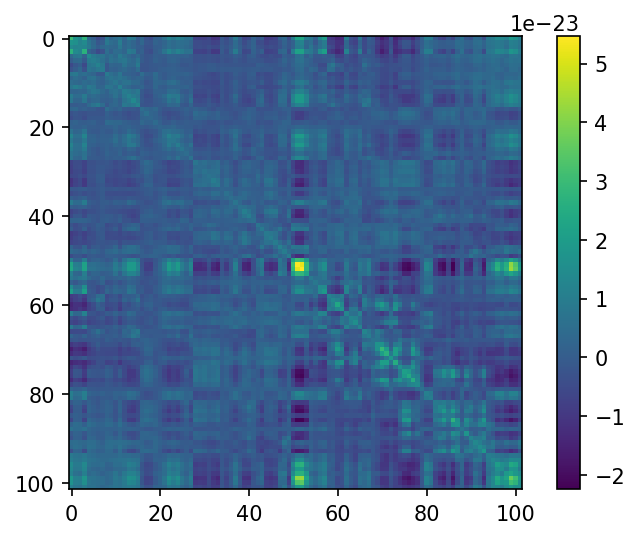

In [152]:
plt.close("all")
plt.figure()
plt.imshow(cov_mat)
plt.colorbar()
plt.show()


*There seems to be a correlation between the sensors, indicating that not all of them pick up independent signals - there seems to be a bit of overlapping. We see this as there are several dark blue as well as light green/yellow colours, indicating correlation. Had the sensors picked up independent signals, we would expect to see a covariance matrix with a lighter petrol blue color than is the case in many areas of the plot.*

**iv. Make an average over the repetition dimension using `np.mean` - use the `axis` argument. (The resulting array should have two dimensions with time as the first and magnetic field as the second) - mistake? I have choosen magnetic field as the first and time as the second.**

In [154]:
avr_rep = np.mean(data, axis=0) # repetition of visual stim
avr_rep.shape # 102 elements (avg activity per reps across sensors) in first dimension, 251 elements in dimension 2.  

(102, 251)

 **v. Plot the magnetic field (based on the average) as it evolves over time for each of the sensors (a line for each) (time on the x-axis and magnetic field on the y-axis). Add a horizontal line at $y = 0$ and a vertical line at $x = 0$ using `plt.axvline` and `plt.axhline`**  

<function matplotlib.pyplot.show(close=None, block=None)>

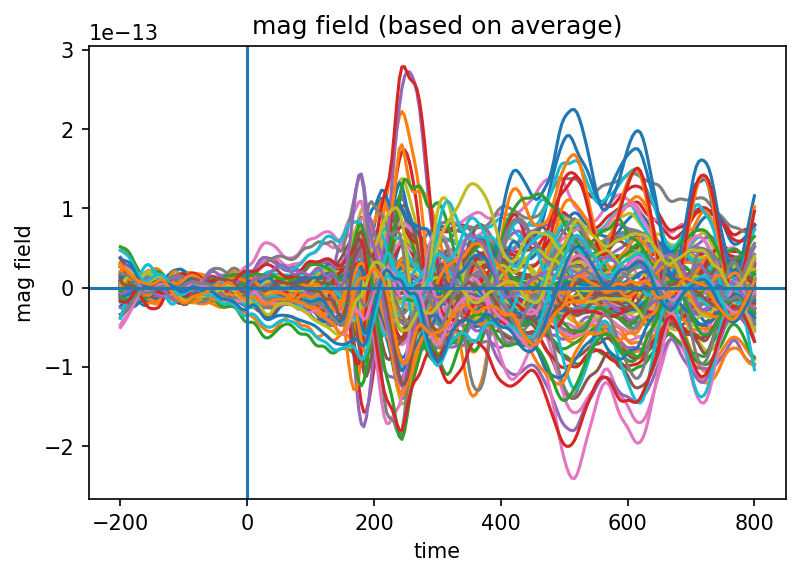

In [193]:
plt.figure()
plt.plot(time, avr_rep.T)
plt.axvline(x=0)
plt.axhline(y=0)
plt.xlabel("time")
plt.ylabel("mag field")
plt.title("mag field (based on average)")
plt.show

  **vi. Find the maximal magnetic field in the average. Then use `np.argmax` and `np.unravel_index` to find the sensor that has the maximal magnetic field.** 

*The numpy.argmax() function returns indices of the max element of the array in a particular axis.*


*The np.unravel_inex converts a flat index or array of flat indices into a tuple of coordinate arrays*



In [166]:
print(np.unravel_index(np.argmax(avr_rep), avr_rep.shape))

(73, 112)


*Sensor 73 has the average maximal magnetic field (at repetition 112). Below, I find the value of the magnetic field in the average using two equivalent commands to double check that it is correct*

In [170]:
print(avr_rep[73,112]) # 2.7886216843591933e-13
np.amax(avr_rep) # 2.7886216843591933e-13

print(time[112]) 

2.7886216843591933e-13
248


*The sensor that has the maximal magnetic field is sensor number 73. It happens at repetition 112 (248 miliseconds after the stimulus was shown).*

  **vii. Plot the magnetic field for each of the repetitions (a line for each) for the sensor that has the maximal magnetic field. Highlight the time point with the maximal magnetic field in the average (as found in 1.1.v) using `plt.axvline`**

*Sensor 73 has the maximal magnetic field (at repetition 112) of 2.7886216843591933e-13. But we wanna know at which time point this is*

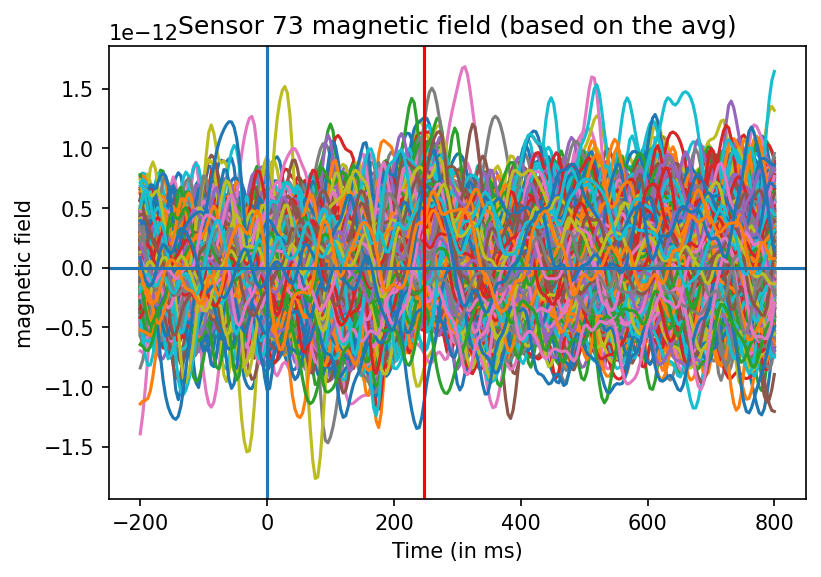

In [335]:

plt.figure()
plt.plot(time, data[:,73,:].T)
plt.axvline(x = 0) #Highlight the time point with the maximal magnetic field in the average
plt.axhline(y = 0)
plt.axvline(x = 248, color = "red")
plt.xlabel("Time (in ms)")
plt.ylabel("magnetic field")
plt.title("Sensor 73 magnetic field (based on the avg)")
plt.show()


**viii. Describe in your own words how the response found in the average is represented in the single repetitions. But do make sure to use the concepts _signal_ and _noise_ and comment on any differences on the range of values on the y-axis**  


*The above plot visualises the recordings of sensor 73. Each line in the plot represents a single repetiotion (total of 682).*

*Averaging across repetitions cancels out noise, making it more easy to pinpoint the picking up of actual signals.*

*The range of values on the y-axis seems to be more positive right at the red line which highlights the time point with the maximal magnetic field in the average. At this time point, the range on the y axis is not only more positive (indicating a stronger magnetic field), but also more narrow, indicating that the sensor has picked up more noise at other repetitions.*

## 2) Now load pas_vector.npy (call it y). PAS is the same as in Assignment 2, describing the clarity of the subjective experience the subject reported after seeing the briefly presented stimulus

In [194]:
y = np.load("pas_vector.npy")
len(y)

682

**i. Which dimension in the `data` array does it have the same length as?** 

*It has the same length as the first dimension i.e., number of repetitions of a visual stimuli. This is due to the fact that the participant has given a PAS rating for each repetition.*

**ii. Now make four averages (As in Exercise 1.1.iii), one for each PAS rating, and plot the four time courses (one for each PAS rating) for the sensor found in Exercise 1.1.v  (1.1.v.i)**

*The sensor found in 1.1.v was sensor 73. Below, I subset so I am only using data from sensor 73*

In [340]:
sensor_73 = data[:,73,:] 

*Below I find index for each possible PAS rating (1-4). Assigning to a list.* 

In [343]:
PAS_1= np.where(y == 1)
PAS_2= np.where(y == 2) 
PAS_3= np.where(y == 3) 
PAS_4= np.where(y == 4) 

*Now I use np.mean to find the average magnetic field for each of the pas ratings seperately*

In [344]:
avgrepPAS_1 = np.mean(sensor_73[PAS_1], axis= 0)
avgrepPAS_2 = np.mean(sensor_73[PAS_2], axis= 0)
avgrepPAS_3 = np.mean(sensor_73[PAS_3], axis= 0)
avgrepPAS_4 = np.mean(sensor_73[PAS_4], axis= 0)

*I know plot the four time courses (one for each PAS rating) for the sensor found in Exercise 1.1.v*

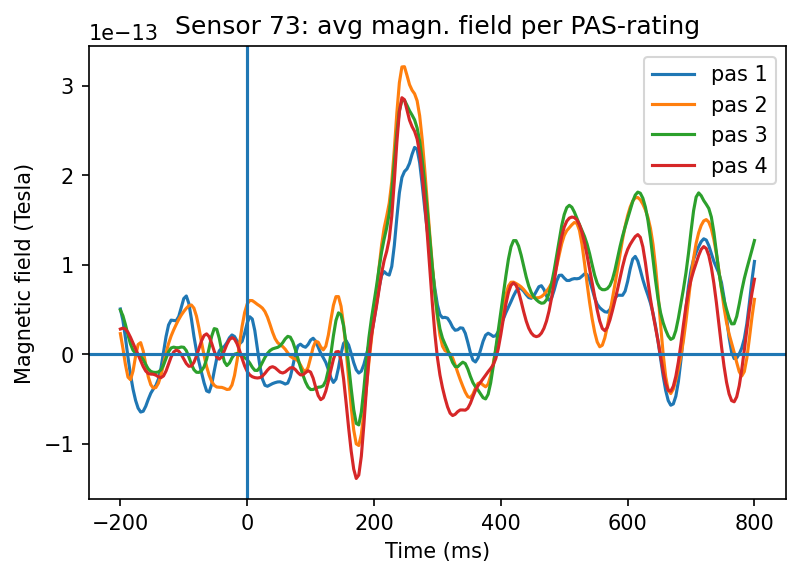

In [352]:
plt.figure()
plt.plot(time,avgrepPAS_1)
plt.plot(time,avgrepPAS_2)
plt.plot(time,avgrepPAS_3)
plt.plot(time,avgrepPAS_4)
plt.axvline()
plt.axhline()
plt.xlabel("Time (ms)")
plt.ylabel("Magnetic field (Tesla)")
plt.title("Sensor 73: avg magn. field per PAS-rating")
plt.legend(["pas 1", "pas 2", "pas 3", "pas 4"])
plt.show()

**iii. Notice that there are two early peaks (measuring visual activity from the brain), one before 200 ms and one around 250 ms. Describe how the amplitudes of responses are related to the four PAS-scores. Does PAS 2 behave differently than expected?**  

*The plot visualises average brain activity for sensor 73 across repetitions but divided according to PAS rating.*

*As expected, PAS1 is lowest. This makes sense at it corresponds to the least perceptual awareness possible.* 

*PAS2 behaves differently than expected. The amplitude of PAS2 is quite high (and suprisingly higher than PAS4), which is surprising as it corresponds to having only a weak glimpse (i.e. "A feeling that something has been shown. Not characterized by any content, and this cannot be specified any further). One would expectthe line for PAS4 to have the biggest amplitude as this would be related to the most clear perceptual awareness. Nonetheless, it does seem that the sensor picks up a stronger signal even at ratings of lower perceptual awareness.*

# EXERCISE 2 - Do logistic regression to classify pairs of PAS-ratings  

## 1) Now, we are going to do Logistic Regression with the aim of classifying the PAS-rating given by the subject  

**i. We'll start with a binary problem - create a new array called `data_1_2` that only contains PAS responses 1 and 2. Similarly, create a `y_1_2` for the target vector**  

*I wanna take only PAS responses 1 and 2 - choosing axis 0 which is our first dimension, i.e. repetition*

In [360]:
data_1_2 = np.concatenate((data[PAS_1], data[PAS_2]), axis=0) 

data_1_2.ndim # number of dimensions
data_1_2.shape # (214, 102, 251)        

(214, 102, 251)

*Creating a target vector (y_1_2). I create a loop. It goes through our pas vector y. If y == 1, it appends it to y_1_2 as 1.* *Similarly, if y in our pas vector == 2, it appends it to y_1_2 as 2*

In [ ]:
y_1_2 = []
for i in range(len(y)):
    if y[i] == 1:
        y_1_2.append(1)
    if y[i] == 2:
        y_1_2.append(2)

**ii. Scikit-learn expects our observations (`data_1_2`) to be in a 2d-array, which has samples (repetitions) on dimension 1 and features (predictor variables) on dimension 2. Our `data_1_2` is a three-dimensional array. Our strategy will be to collapse our two last dimensions (sensors and time) into one dimension, while keeping the first dimension as it is (repetitions). Use `np.reshape` to create a variable `X_1_2` that fullfils these criteria.**  

*Dim 1, rows: repetition[dim 0]*

*Dim 2, columns: sensor & time [dim 1-2]*

In [373]:
# Taking out first dimension and the 2 other dimensions collapsed
X_1_2 = data_1_2.reshape(data_1_2.shape[0],(data_1_2.shape[1]*data_1_2.shape[2])) 

X_1_2.shape # 214, 25602 

(214, 25602)

**iii. Import the `StandardScaler` and scale `X_1_2`**

In [374]:
from sklearn.preprocessing import StandardScaler 

*I am now scaling X_1_2. It means applying centering (subtracting the mean and standardizing, bringing everything to the same scale).*

In [372]:
sc = StandardScaler()
X_1_2_sc = sc.fit_transform(X_1_2) 

**iv. Do a standard `LogisticRegression` - can be imported from `sklearn.linear_model` - make sure there is no `penalty` applied**

In [375]:
from sklearn.linear_model import LogisticRegression

logR = LogisticRegression(penalty='none')
logR.fit(X_1_2_sc, y_1_2)

LogisticRegression(penalty='none')

**v. Use the `score` method of `LogisticRegression` to find out how many labels were classified correctly. Are we overfitting? Besides the score, what would make you suspect that we are overfitting?** 

In [376]:
print('Training accuracy (i.e., labels classified correctly):',logR.score(X_1_2_sc, y_1_2)) 

Training accuracy (i.e., labels classified correctly): 1.0


*The logistic regression classifies 100% of the labels correctly. A classification error of 0 suggest that we are overfitting, especially taking into consideration the fact that our model doesn't include any penalty. We also haven't split our data into a test and a training set (so we didn't test on unseen data).*

  vi. Now apply the _L1_ penalty instead - how many of the coefficients (`.coef_`) are non-zero after this?  

*L1 regularization is a penalty against model complexity. It means replacing the square of the weights by the sum of the absolute values of the weights and does often yield sparse feature vectors where most feature weights are zero. This is practical in a high dimensional dataset with many irrelevant features.. So it is useful for feature selection!*

In [381]:
# With regularisation
logPen = LogisticRegression(random_state = 1, penalty='l1', solver='liblinear') 
logPen.fit(X_1_2_sc, y_1_2)


print('Training accuracy (i.e., labels classified correctly):',logPen.score(X_1_2_sc, y_1_2))


Training accuracy (i.e., labels classified correctly): 1.0


*I now want to find the non-zero coefficients:*

In [405]:
coefs = logPen.coef_.flatten() # make 2D array to a list
coefs
non_zero_indices = coefs != 0 
non_zero_indices

X_1_2_sc.shape
X_reduced = X_1_2_sc[:,non_zero_indices]
X_reduced.shape

(214, 217)

*217 coefficients were non-zero after applying L1 penalty*

**vii. Create a new reduced $X$ that only includes the non-zero coefficients - show the covariance of the non-zero features (two covariance matrices can be made; $X_{reduced}X_{reduced}^T$ or $X_{reduced}^TX_{reduced}$ (you choose the right one)). Plot the covariance of the features using `plt.imshow`. Compared to the plot from 1.1.iii, do we see less covariance?**  

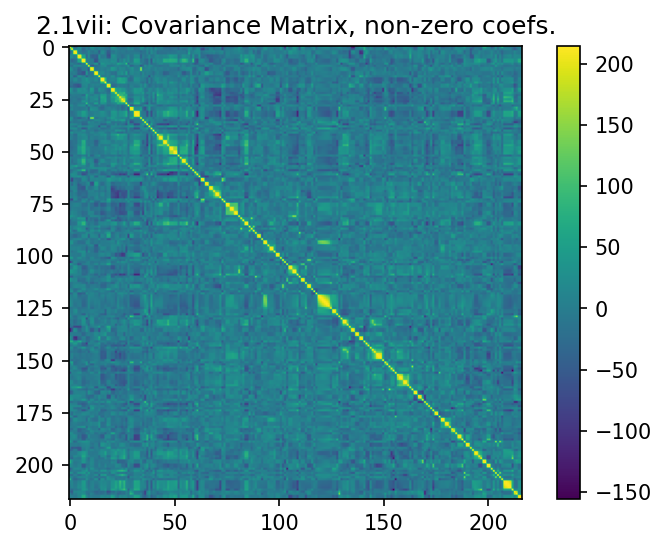

In [442]:
covmat = X_reduced.T @ X_reduced
covmat.shape

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(covmat)
plt.title("2.1vii: Covariance Matrix, non-zero coefs.")
plt.colorbar()
plt.show()



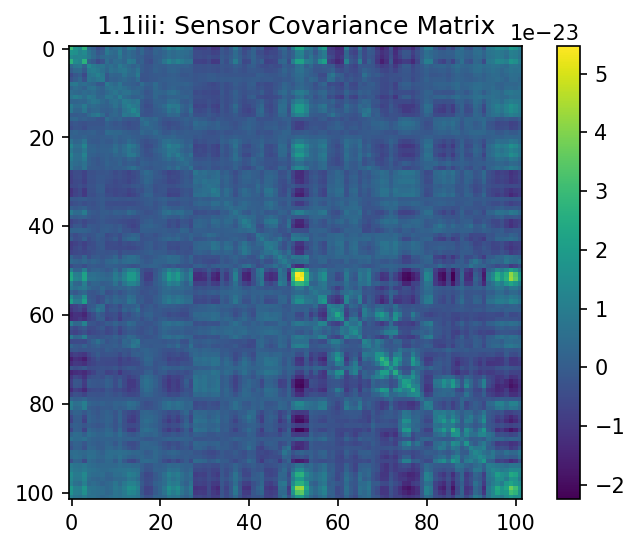

In [445]:
plt.figure()
plt.imshow(cov_mat)
plt.title("1.1iii: Sensor Covariance Matrix")
plt.colorbar()
plt.show()

*Compared to the plot from 1.1.iii, we see more covariance.* 


## 2) Now, we are going to build better (more predictive) models by using cross-validation as an outcome measure    

 **i. Import `cross_val_score` and `StratifiedKFold` from `sklearn.model_selection`**

In [446]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

 **ii. To make sure that our training data sets are not biased to one target (PAS) or the other, create `y_1_2_equal`, which should have an equal number of each target.** 
  
 
**Create a similar `X_1_2_equal`. The function `equalize_targets_binary` in the code chunk associated with Exercise 2.2.ii can be used. Remember to scale `X_1_2_equal`!**  

In [470]:

def equalize_targets_binary(data, y):
    np.random.seed(7)
    targets = np.unique(y) ## find the number of targets
    if len(targets) > 2:
        raise NameError("can't have more than two targets")
    counts = list()
    indices = list()
    for target in targets:
        counts.append(np.sum(y == target)) ## find the number of each target
        indices.append(np.where(y == target)[0]) ## find their indices
    min_count = np.min(counts)
    # randomly choose trials
    first_choice = np.random.choice(indices[0], size=min_count, replace=False)
    second_choice = np.random.choice(indices[1], size=min_count,replace=False)
    
    # create the new data sets
    new_indices = np.concatenate((first_choice, second_choice))
    new_y = y[new_indices]
    new_data = data[new_indices, :, :]
    
    return new_data, new_y


# Make training data that isn't biased to one target (PAS)
data_1_2_equal, y_1_2_equal = equalize_targets_binary(data_1_2, y_1_2)

# Reshaping X_1_2_equal from 3D to 2D.  
X_1_2_equal = data_1_2_equal.reshape(data_1_2_equal.shape[0], -1) #-1 takes everything else than. 
X_1_2_equal_sc = sc.fit_transform(X_1_2_equal) # standardizing


######## Just checking
y_1_2_equal.shape # check data (1 dim)
data_1_2_equal.shape # check t data (3 dim)


X_1_2_equal.shape # 198 PAS ratings (99 PAS1 and 99 PAS2)
# 25602 coefficients

(198, 25602)

**iii. Do cross-validation with 5 stratified folds doing standard `LogisticRegression` (See Exercise 2.1.iv)** 

In [475]:
logR = LogisticRegression(penalty ='none') # specifying model
logR.fit(X_1_2_equal_sc, y_1_2_equal) # fit model on data


from sklearn.model_selection import cross_val_score, StratifiedKFold  
cv = StratifiedKFold() 

scores = cross_val_score(logR, X_1_2_equal_sc, y_1_2_equal, cv=5) # cv = 5 specifies we want 5 folds
print(np.mean(scores)) #0.4746153846153846

0.4746153846153846


**iv. Do L2-regularisation with the following `Cs=  [1e5, 1e1, 1e-5]`. Use the same kind of cross-validation as in Exercise 2.2.iii. In the best-scoring of these models, how many more/fewer predictions are correct (on average)?**  

In [476]:
#LOG 1e5 
log_1e5 = LogisticRegression(penalty='l2', C=1e5)
log_1e5.fit(X_1_2_equal, y_1_2_equal)
scores_log_1e5 = cross_val_score(log_1e5, X_1_2_equal, y_1_2_equal, cv=cv)
#LOG 1e1
log_1e1 = LogisticRegression(penalty='l2', C=1e1)
log_1e1.fit(X_1_2_equal, y_1_2_equal)
scores_log_1e1 = cross_val_score(log_1e1, X_1_2_equal, y_1_2_equal, cv=cv)
#LOG 1e-5
log_1e_neg5 = LogisticRegression(penalty='l2', C=1e-5) 
log_1e_neg5.fit(X_1_2_equal, y_1_2_equal)
scores_log_1e_neg5 = cross_val_score(log_1e_neg5, X_1_2_equal, y_1_2_equal, cv=cv)

In [477]:
# With C = 1e5
cv = StratifiedKFold()

logR = LogisticRegression(C=1e5, penalty="l2")
logR.fit(X_1_2_equal, y_1_2_equal)

scores = cross_val_score(logR, X_1_2_equal, y_1_2_equal, cv=5)
print(np.mean(scores))

0.4948717948717949


In [478]:
# With C = 1e1
cv = StratifiedKFold()

logR = LogisticRegression(C=1e1, penalty="l2")
logR.fit(X_1_2_equal, y_1_2_equal)

scores = cross_val_score(logR, X_1_2_equal, y_1_2_equal, cv=5)
print(np.mean(scores))

0.4948717948717949


In [480]:
# With C = 1e-1
cv = StratifiedKFold()

logR = LogisticRegression(C=1e-5, penalty="l2")
logR.fit(X_1_2_equal, y_1_2_equal)

logR.predict

scores = cross_val_score(logR, X_1_2_equal, y_1_2_equal, cv=5)
print(np.mean(scores))

0.4948717948717949


With C = 1e5, .45487179487179485


With C = 1e1, .4746153846153846


With C = 1e-1, 0.45487179487179485

  v. Instead of fitting a model on all `n_sensors * n_samples` features, fit  a logistic regression (same kind as in Exercise 2.2.iv (use the `C` that resulted in the best prediction)) for __each__ time sample and use the same cross-validation as in Exercise 2.2.iii. What are the time points where classification is best? Make a plot with time on the x-axis and classification score on the y-axis with a horizontal line at the chance level (what is the chance level for this analysis?)  

In [314]:
cv = StratifiedKFold()

logR = LogisticRegression(C=1e1, penalty="l2", solver = "liblinear")
cv_scores = []

# Subsetting time
for i in range(251):
    t = sc.fit_transform(data_1_2_equal[:,:,i])
    logR.fit(t, y_1_2_equal)
    scores = cross_val_score(logR, t, y_1_2_equal, cv=5)
    cv_scores.append(np.mean(scores))

In [320]:
# Finding best classification
np.amax(cv_scores)


0.611025641025641

In [321]:
# Index (time point) with highest classification
np.argmax(cv_scores) 

94

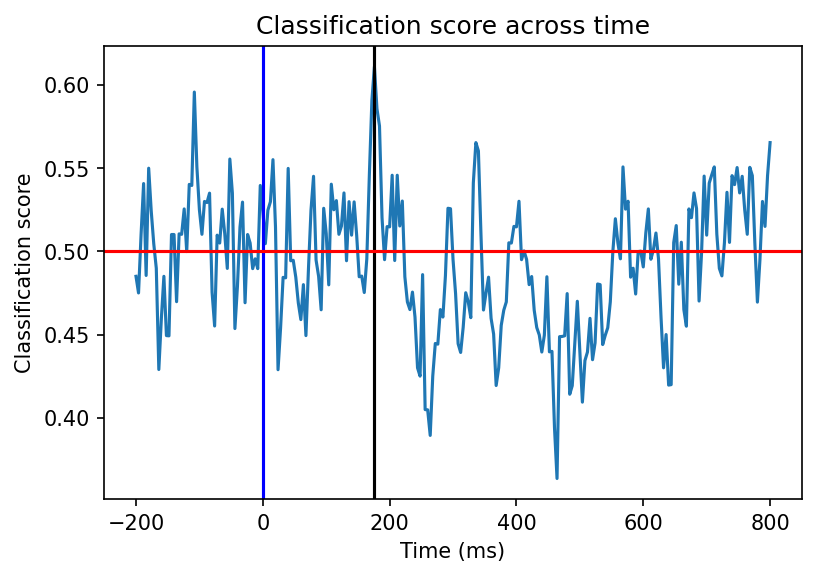

176

In [333]:
plt.figure() 
plt.plot(time, cv_scores)
plt.axvline(x = 0, color="blue")
plt.axvline(time[94], color="black")
plt.axhline(y = 0.5,color="red") # chance level (50%)
plt.xlabel("Time (ms)")
plt.ylabel("Classification score")
plt.title("Classification score across time")
plt.figure
plt.show()

time[94]

# Classification is best at 176 ms.

*As it can be seen above, the classification is best at the time point idex 94 (illustrated by the black line). This corresponds to the time point of 176 ms after stimulus was shown
.*

vi. Now do the same, but with L1 regression - set `C=1e-1` - what are the time points when classification is best? (make a plot)? 

In [103]:
cv = StratifiedKFold()
logR = LogisticRegression(C=1e-1, penalty="l1", solver = "liblinear")
cv_scores = []

# Subsetting time
for i in range(251):
    t = sc.fit_transform(data_1_2_equal[:,:,i])
    logR.fit(t, y_1_2_equal)
    scores = cross_val_score(logR, t, y_1_2_equal, cv=5)
    cv_scores.append(np.mean(scores))


In [104]:
# Picking highest score
np.amax(cv_scores)
np.argmax(cv_scores) # Index with highest classification

36

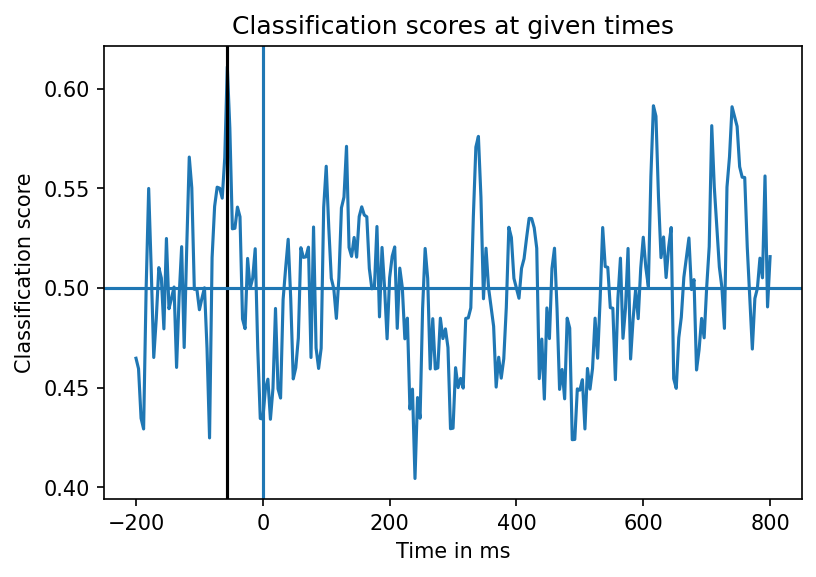

-56

In [107]:
plt.figure() 
plt.plot(time, cv_scores)
plt.axvline(x = 0)
plt.axvline(time[36], color = "black")
plt.axhline(y = 0.5) # Chance level is 50% for binary classification
plt.xlabel("Time in ms")
plt.ylabel("Classification score")
plt.title("Classification scores at given times")
plt.figure
plt.show()

time[36]

# Classification is best at -56 ms.

  vii. Finally, fit the same models as in Exercise 2.2.vi but now for `data_1_4` and `y_1_4` (create a data set and a target vector that only contains PAS responses 1 and 4). What are the time points when classification is best? Make a plot with time on the x-axis and classification score on the y-axis with a horizontal line at the chance level (what is the chance level for this analysis?)  

In [108]:
# Prepare array
data_1_4 = np.concatenate((data[PAS_1], data[PAS_4]), axis=0)
data_1_4.shape

(359, 102, 251)

In [109]:
# Prepare target vector
y_1_4 = []
for i in range(len(y)):
    if y[i] == 1:
        y_1_4.append(1)
    if y[i] == 4:
        y_1_4.append(4)

# repetition as rows, and sensor and time as columns
X_1_4 = data_1_4.reshape(359, -1)
X_1_4.shape

(359, 25602)

In [111]:
# Standardizing data
X_1_4_scaled = sc.fit_transform(X_1_4)

In [113]:
# Making equal data with function
y_1_4 = np.array(y_1_4) # Has to be array instead of list, thats why
data_1_4_equal, y_1_4_equal = equalize_targets_binary(data_1_4, y_1_4) # Assigning new data
X_1_4_equal = data_1_4_equal.reshape(198, -1)
X_1_4_equal = sc.fit_transform(X_1_4_equal)

In [115]:
cv = StratifiedKFold()
logR = LogisticRegression(C=1e-1, penalty="l1", solver = "liblinear")
cv_scores_1_4 = []

# Subsetting time
for i in range(251):
    t = sc.fit_transform(data_1_4_equal[:,:,i])
    logR.fit(t, y_1_4_equal)
    scores = cross_val_score(logR, t, y_1_4_equal, cv=5)
    cv_scores_1_4.append(np.mean(scores))

In [116]:
# Picking highest score
np.amax(cv_scores_1_4)
np.argmax(cv_scores_1_4) # Indeci with highest classification

118

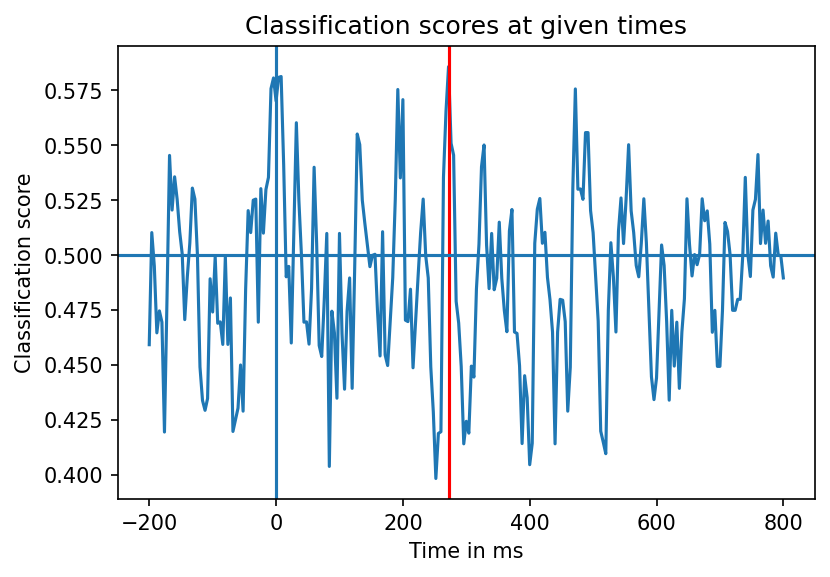

<Figure size 900x600 with 0 Axes>

272

In [120]:

# Plotting
plt.figure() 
plt.plot(time, cv_scores_1_4)
plt.axvline(x = 0)
plt.axvline(time[118], color = "red")
plt.axhline(y = 0.5) # Chance level is 50% for binary classification
plt.xlabel("Time in ms")
plt.ylabel("Classification score")
plt.title("Classification scores at given times")
plt.figure()
plt.show()

time[118]

# Classification is best at 272 ms.


## 3) Is pairwise classification of subjective experience possible? Any surprises in the classification accuracies, i.e. how does the classification score fore PAS 1 vs 4 compare to the classification score for PAS 1 vs 2?  

# EXERCISE 3 - Do a Support Vector Machine Classification on all four PAS-ratings  

## 1) Do a Support Vector Machine Classification  
    i. First equalize the number of targets using the function associated with each PAS-rating using the function associated with Exercise 3.1.i  
    

In [121]:

# Define function
def equalize_targets(data, y):
    np.random.seed(7)
    targets = np.unique(y)
    counts = list()
    indices = list()
    for target in targets:
        counts.append(np.sum(y == target))
        indices.append(np.where(y == target)[0])
    min_count = np.min(counts)
    first_choice = np.random.choice(indices[0], size=min_count, replace=False)
    second_choice = np.random.choice(indices[1], size=min_count, replace=False)
    third_choice = np.random.choice(indices[2], size=min_count, replace=False)
    fourth_choice = np.random.choice(indices[3], size=min_count, replace=False)
    
    new_indices = np.concatenate((first_choice, second_choice,
                                 third_choice, fourth_choice))
    new_y = y[new_indices]
    new_data = data[new_indices, :, :]
    
    return new_data, new_y


In [122]:
# Making data equal
data_equal, y_equal = equalize_targets(data, y)
print(data_equal.shape)
print(y_equal.shape)

(396, 102, 251)
(396,)


ii. Run two classifiers, one with a linear kernel and one with a radial basis (other options should be left at their defaults) - the number of features is the number of sensors multiplied the number of samples. Which one is better predicting the category?

In [ ]:
# Import
from sklearn.svm import SVC

# Making classes
svm_linear = SVC(kernel="linear")
svm_radial = SVC(kernel="rbf")

# Converting to 2d array
X_equal = data_equal.reshape(396, -1)
print(X_equal.shape)

# Standardizing
X_equal_scaled = sc.fit_transform(X_equal)

# Fitting
scores_svm_linear = cross_val_score(svm_linear, X_equal_scaled, y_equal, cv=cv)
print("The linear basis classifier score is", np.mean(scores_svm_linear))

# Fitting
scores_svm_radial = cross_val_score(svm_radial, X_equal_scaled, y_equal, cv=cv)
print("The radial basis classifier score is", np.mean(scores_svm_radial))

 iii. Run the sample-by-sample analysis (similar to Exercise 2.2.v) with the best kernel (from Exercise 3.1.ii). Make a plot with time on the x-axis and classification score on the y-axis with a horizontal line at the chance level (what is the chance level for this analysis?)

In [ ]:
# I need 251 models.
cv = StratifiedKFold()
svm_radial = SVC(kernel="rbf")
cv_scores_svm = []

# Subsetting time
for i in range(251):
    t = sc.fit_transform(data_equal[:,:,i])
    logR.fit(t, y_equal)
    scores = cross_val_score(svm_radial, t, y_equal, cv=5)
    cv_scores_svm.append(np.mean(scores))


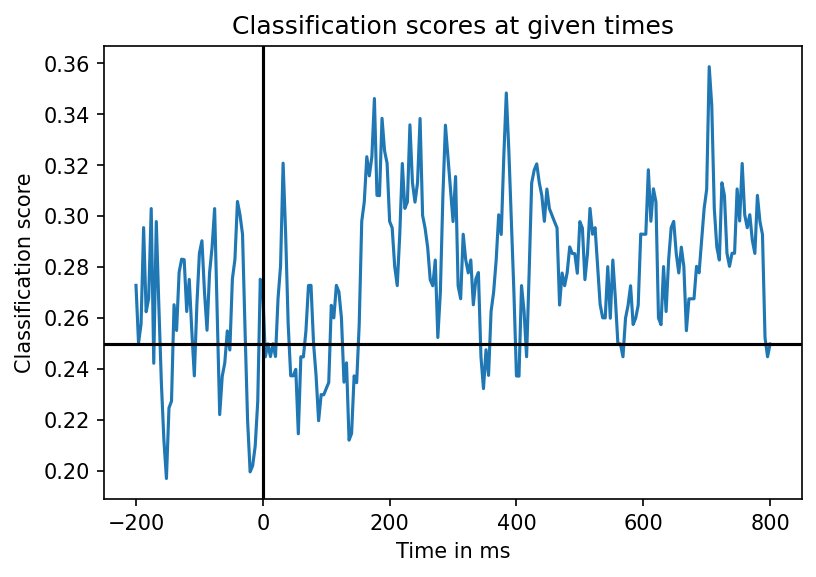

In [127]:
plt.figure() 
plt.plot(time, cv_scores_svm)
plt.axvline(x = 0, color = "black")
plt.axhline(y = 0.25, color = "black") # Chance level is 25% for classification with 4 classes
plt.xlabel("Time in ms")
plt.ylabel("Classification score")
plt.title("Classification scores at given times")
plt.show()

 iv. Is classification of subjective experience possible at around 200-250 ms? 

It seems to have a classification score arround 0.32 - 0.35, indicating a better than chance level for classfication of subjective exeprience at this time. 

## 2) Finally, split the equalized data set (with all four ratings) into a training part and test part, where the test part if 30 % of the trials. Use `train_test_split` from `sklearn.model_selection`

In [130]:
from sklearn.model_selection import train_test_split

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_equal, y_equal, test_size=0.30)

i. Use the kernel that resulted in the best classification in Exercise 3.1.ii and `fit`the training set and `predict` on the test set. This time your features are the number of sensors multiplied by the number of samples.  

In [132]:
# Setting up class
svm_radial = SVC(kernel="rbf")

# Fitting
svm_radial.fit(X_train, y_train)

# Predicting
predictions = svm_radial.predict(X_test)
print(predictions)

[3 3 2 1 4 1 4 3 4 4 2 3 3 3 3 2 3 1 1 4 4 1 4 3 3 3 4 1 4 4 1 3 4 3 3 4 4
 1 1 1 4 1 1 3 1 4 1 4 4 2 4 4 1 3 4 1 1 4 3 3 1 1 3 1 4 3 4 3 4 1 3 4 4 4
 4 1 3 3 1 4 1 3 3 3 1 3 1 1 3 3 3 4 3 4 3 3 1 3 4 1 4 1 3 1 3 3 2 1 1 3 2
 4 1 3 1 1 4 1 3]


ii. Create a _confusion matrix_. It is a 4x4 matrix. The row names and the column names are the PAS-scores. There will thus be 16 entries. The PAS1xPAS1 entry will be the number of actual PAS1, $y_{pas1}$ that were predicted as PAS1, $\hat y_{pas1}$. The PAS1xPAS2 entry will be the number of actual PAS1, $y_{pas1}$ that were predicted as PAS2, $\hat y_{pas2}$ and so on for the remaining 14 entries.  Plot the matrix

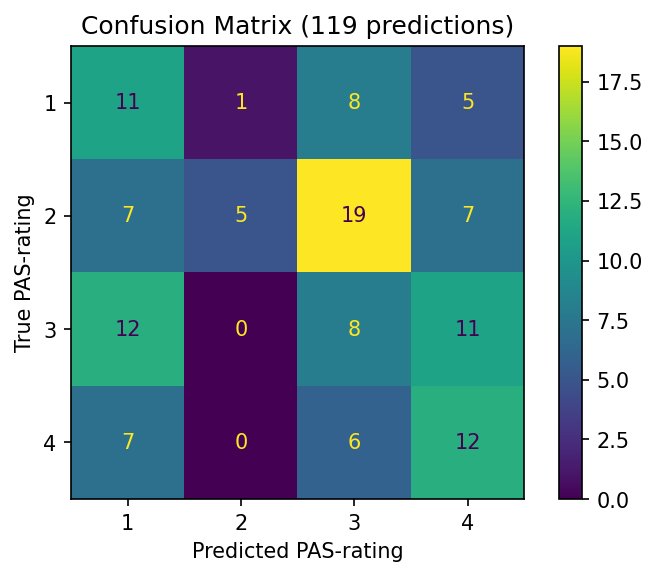

In [134]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay as cmd

# Plot
plt.close("all")
cmd.from_estimator(svm_radial, X_test, y_test) # Plotting given estimator, test data and true labels.
plt.xlabel("Predicted PAS-rating")
plt.ylabel("True PAS-rating")
plt.title("Confusion Matrix (119 predictions)")
plt.show()

 iii. Based on the confusion matrix, describe how ratings are misclassified and if that makes sense given that ratings should measure the strength/quality of the subjective experience. Is the classifier biased towards specific ratings?  